In [1]:
import json
import skimage
import tensorflow as tf
import matplotlib.pyplot as plt
from model import UNET
from utils import *

%load_ext autoreload
%autoreload 2

In [2]:
with open('config.json') as raw:
    config = json.load(raw)

In [3]:
# Train single batch
unet = UNET(config)
unet.train()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/100
8/8 [==============================] - 165s 21s/step - loss: 7.9208 - acc: 0.8037 - val_loss: 3.9604 - val_acc: 0.5120
Epoch 2/100
8/8 [==============================] - 87s 11s/step - loss: 7.9206 - acc: 0.5580 - val_loss: 3.9603 - val_acc: 0.3774
Epoch 3/100
8/8 [==============================] - 88s 11s/step - loss: 7.9199 - acc: 0.5263 - val_loss: 3.9600 - val_acc: 0.3507
Epoch 4/100
8/8 [==============================] - 88s 11s/step - loss: 7.9176 - acc: 0.5170 - val_loss: 3.9591 - val_acc: 0.4343
Epoch 5/100
8/8 [==============================] - 88s 11s/step - loss: 7.9137 - acc: 0.4875 - val_loss: 3.9574 - val_acc: 0.3543
Epoch 6/100
8/8 [==============================] - 85s 11s/step - loss: 7.9103 - acc: 0.5209 - val_loss: 3.9575 - val_acc: 0.2584
Epoch 7/100
8/8 [====

IndexError: list index out of range

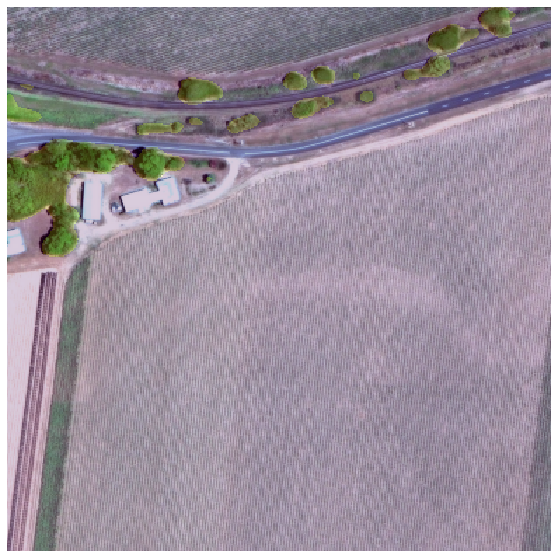

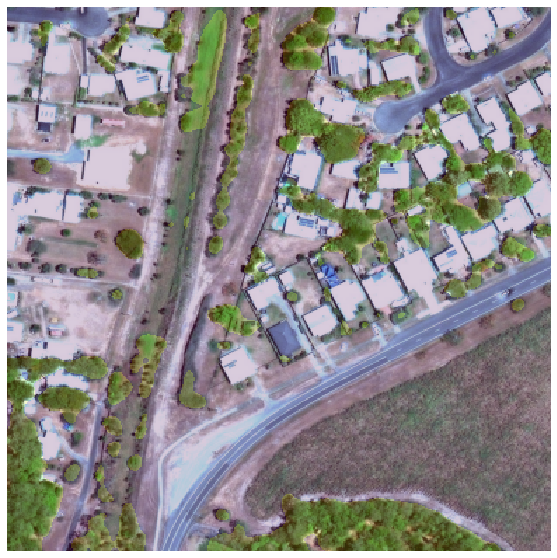

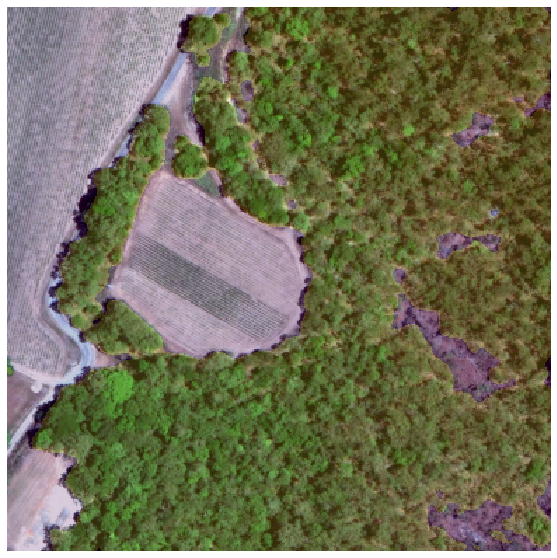

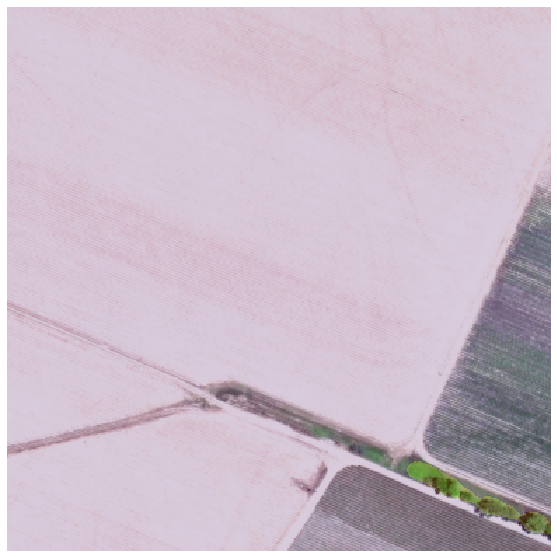

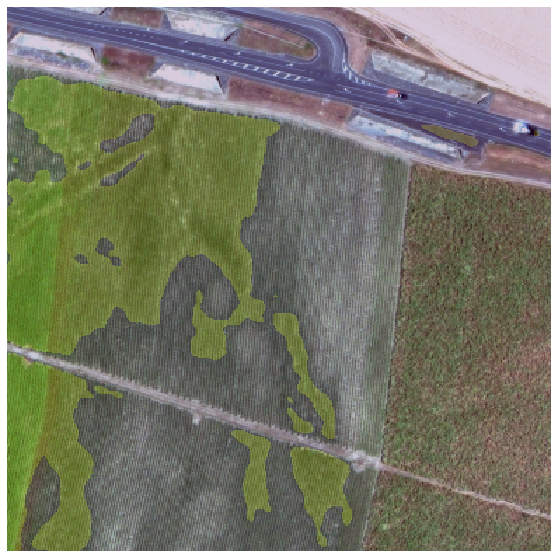

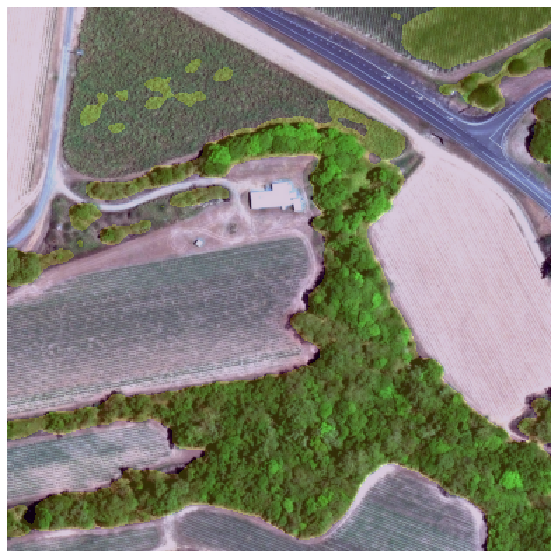

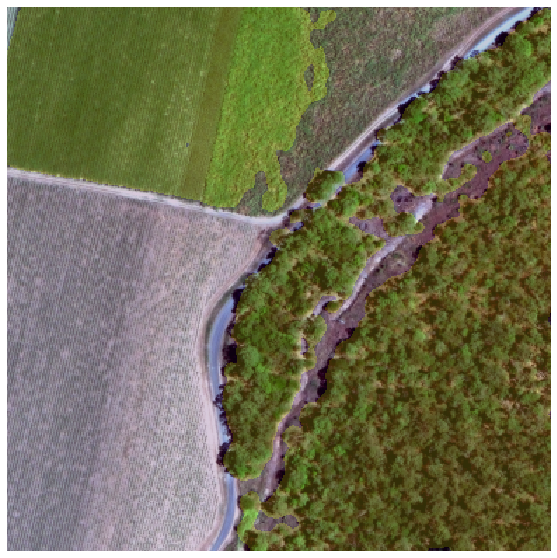

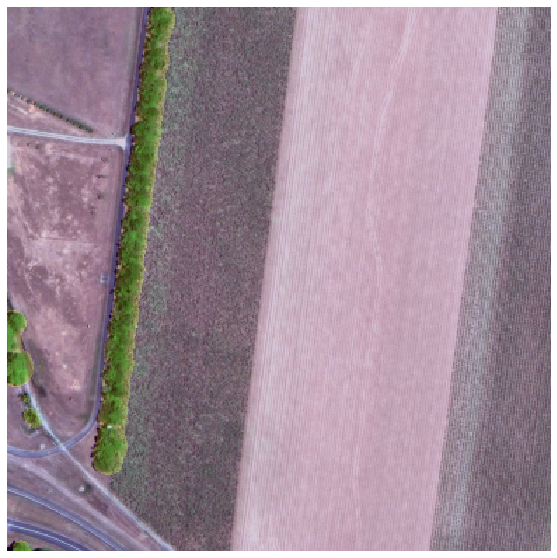

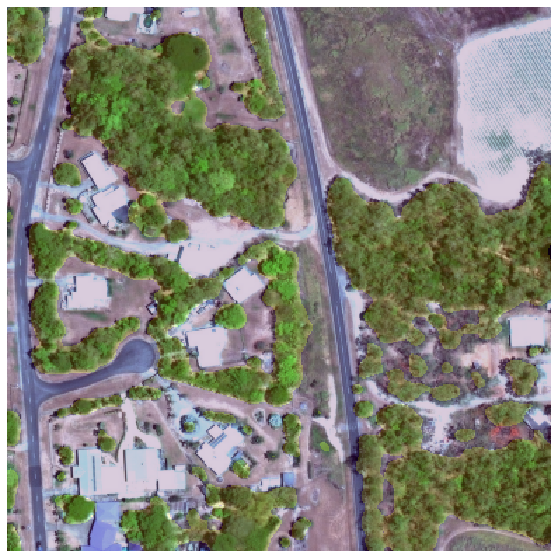

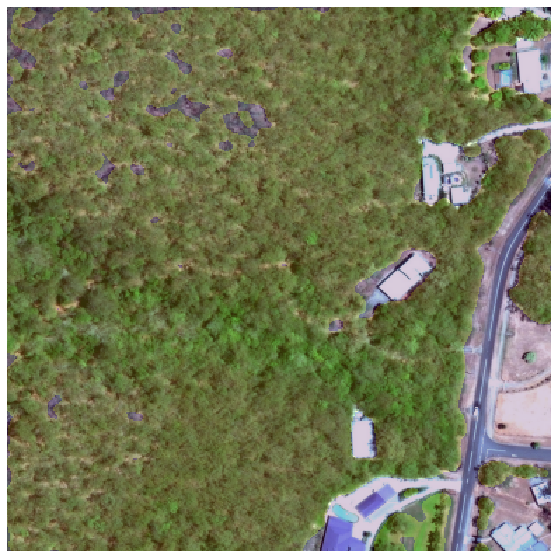

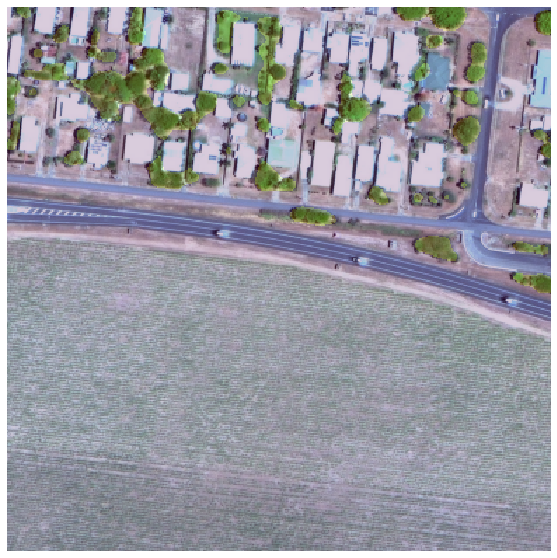

In [11]:
import os
import numpy as np

DIR = 'data/test/'

for i in os.listdir(DIR):
    I = skimage.io.imread(DIR + i)
    I = skimage.transform.resize(I, (388, 388))
    Ip = skimage.util.pad(I, ((92, 92), (92, 92), (0, 0)), 'constant')
    out = unet.model.predict(Ip.reshape(1, *Ip.shape)).argmax(axis=-1).squeeze()

    plt.figure(figsize=(10, 10))
    plt.imshow(I)
    plt.imshow(1-out, alpha=0.2)
    plt.axis('off')
    plt.show()

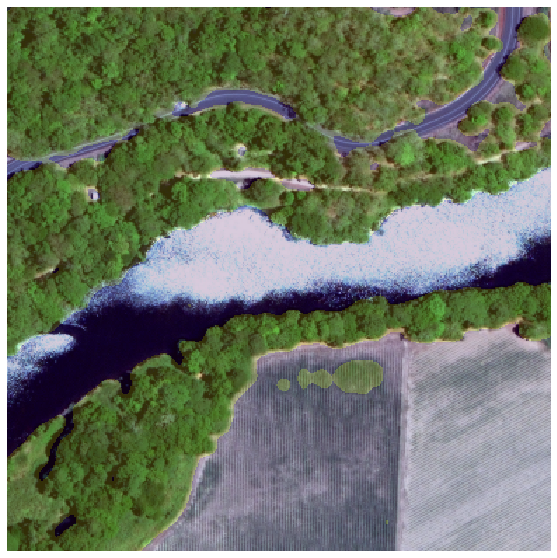

In [13]:
I = skimage.io.imread('data/train/chip_145.76404842951132_-17.135386636381604.jpg')
I = skimage.transform.resize(I, (388, 388))
Ip = skimage.util.pad(I, ((92, 92), (92, 92), (0, 0)), 'constant')
out = unet.model.predict(Ip.reshape(1, *Ip.shape)).argmax(axis=-1).squeeze()
plt.figure(figsize=(10, 10))
plt.imshow(I)
plt.imshow(1-out, alpha=0.2)
plt.axis('off')
plt.show()